In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from env import get_db_url
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from pydataset import data
from env import get_db_url
import pandas as pd
import numpy as np
import wrangle_zillow as w
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
df = train

# 1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### Ho: Logerror is not significantly different for all 3 counties.
### Ha: Logerror is significantly different for all 3 counties.

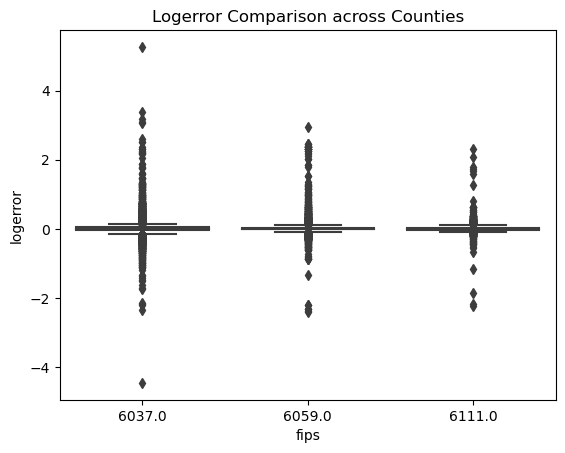

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to compare logerror across counties
sns.boxplot(data=train, x='fips', y='logerror')
plt.xlabel('fips')
plt.ylabel('logerror')
plt.title('Logerror Comparison across Counties')
plt.show()


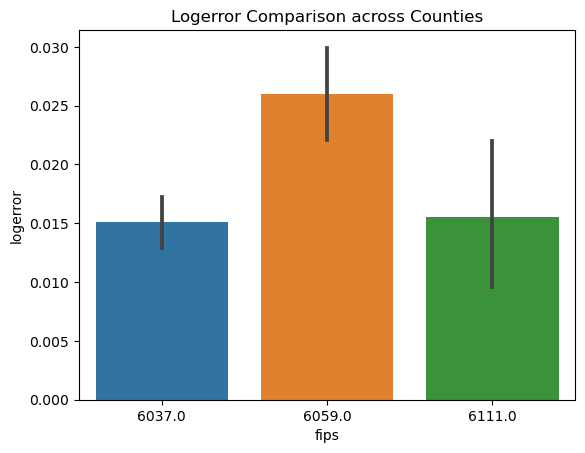

In [5]:
sns.barplot(data=train, x='fips', y='logerror')
plt.xlabel('fips')
plt.ylabel('logerror')
plt.title('Logerror Comparison across Counties')
plt.show()

In [6]:
df.logerror.dtype

dtype('O')

In [7]:
df['logerror'] = df['logerror'].astype(float)
df['fips'] = df['fips'].astype(float)


In [8]:
group1 = df[df['fips'] == 6037]['logerror']
group2 = df[df['fips'] == 6059]['logerror']
group3 = df[df['fips'] == 6111]['logerror']
alpha = 0.05
test_statistic, p_value = stats.f_oneway(group1, group2, group3)


print("Test Statistic (F-value):", test_statistic)
print("p-value:", p_value)


Test Statistic (F-value): 11.566548911280114
p-value: 9.51948003550464e-06


In [9]:
p_value < alpha

True

### We can reject the null hypothesis, therefore Logerror is significantly different for all 3 counties.

# 2. Does log error have a relation with taxvaluedollarcnt?

### Ho: Logerror does not have a relation with taxvaluedollarcnt
### Ha: Logerror does have a relation with taxvaluedollarcnt

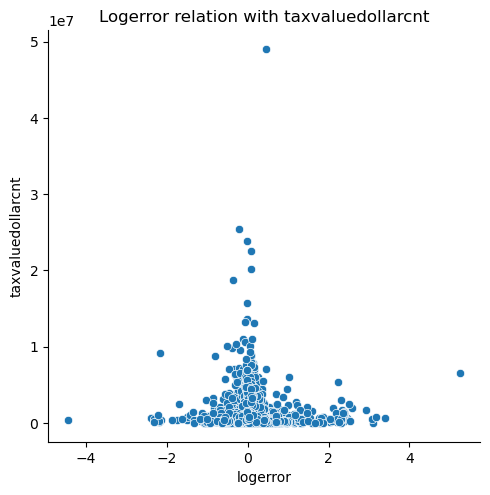

In [10]:
# Create a box plot to compare logerror across counties
sns.relplot(data=train, x='logerror', y='taxvaluedollarcnt')
plt.xlabel('logerror')
plt.ylabel('taxvaluedollarcnt')
plt.title('Logerror relation with taxvaluedollarcnt')
plt.show()


In [11]:
alpha = 0.05

variable1 = 'logerror'
variable2 = 'taxvaluedollarcnt'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.010292696295786172
p-value: 0.0720623620297385


In [12]:
p_value < alpha

False

### We cannot reject the null hypothesis

## 3. Are fips and taxvaluedollarcnt associated

### Ho: fips does not have a association with taxvaluedollarcnt
### Ha: fips does have a association with taxvaluedollarcnt

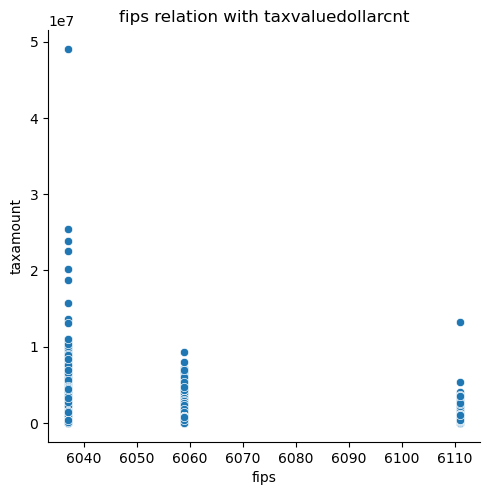

In [13]:

sns.relplot(data=train, x='fips', y='taxvaluedollarcnt')
plt.xlabel('fips')
plt.ylabel('taxamount')
plt.title('fips relation with taxvaluedollarcnt')
plt.show()

In [14]:
alpha = 0.05

variable1 = 'fips'
variable2 = 'taxvaluedollarcnt'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.024073008994047972
p-value: 2.5828844722705166e-05


In [15]:
p_value < alpha

True

### We can reject the null hypothesis

## 3. Are regionidzip and calculatedfinishedsquarefeet associated

### Ho: fips does not have a association with calc sqr feet
### Ha: fips does have a association with calc sqr feet

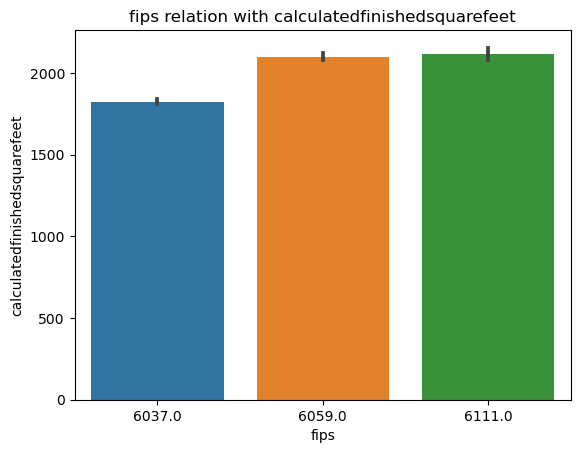

In [16]:
sns.barplot(data=train, x='fips', y='calculatedfinishedsquarefeet')
plt.xlabel('fips')
plt.ylabel('calculatedfinishedsquarefeet')
plt.title('fips relation with calculatedfinishedsquarefeet')
plt.show()

In [17]:
alpha = 0.05

variable1 = 'fips'
variable2 = 'calculatedfinishedsquarefeet'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.10801295654153284
p-value: 9.684136147962639e-80


In [18]:
p_value < alpha

True

### We can reject the null hypothesis

## 4. Is bathroom count and fips related

### Ho: fips does not have a association with bathroom count
### Ha: fips does have a association with bathroom count

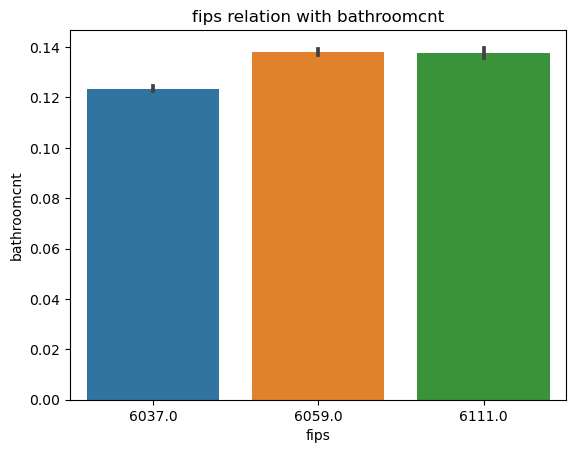

In [19]:
sns.barplot(data=train, x='fips', y='bathroomcnt')
plt.xlabel('fips')
plt.ylabel('bathroomcnt')
plt.title('fips relation with bathroomcnt')
plt.show()

In [20]:
alpha = 0.05

variable1 = 'fips'
variable2 = 'bathroomcnt'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.09386391850265137
p-value: 9.966672090965383e-61


In [21]:
p_value < alpha

True

### We can reject the null hypothesis

# 5. Is fips and calculatedbathnbr related

### Ho: fips does not have a association with bathnbr
### Ha: fips does have a association with bathnbr

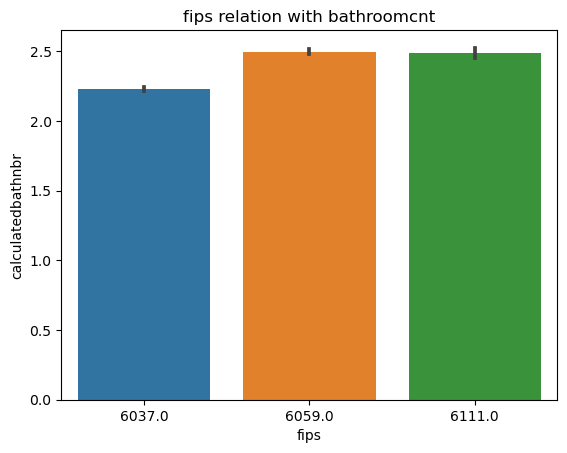

In [22]:
sns.barplot(data=train, x='fips', y='calculatedbathnbr')
plt.xlabel('fips')
plt.ylabel('calculatedbathnbr')
plt.title('fips relation with bathroomcnt')
plt.show()

In [23]:
alpha = 0.05

variable1 = 'fips'
variable2 = 'bathroomcnt'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.09386391850265137
p-value: 9.966672090965383e-61


In [24]:
p_value < alpha

True

### We can reject the null hypothesis